In [64]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
df = pd.read_csv("./AirPassengers.csv")

In [8]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [56]:
df.shape

(144, 2)

In [9]:
df.columns = ["Time","Passenger"]

In [10]:
df.head()

,Time,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
df["Time"] = pd.to_datetime(df["Time"])

In [12]:
df.head()

,Time,Passenger
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
df.dtypes

Time         datetime64[ns]
Passenger             int64
dtype: object

In [15]:
df.set_index(df["Time"],inplace = True)

In [16]:
df.head()

,Time,Passenger
Time,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [21]:
df.drop("Time", inplace = True, axis = 1)

In [22]:
# Checking if the data is stationary or non-stationary

<AxesSubplot:xlabel='Time'>

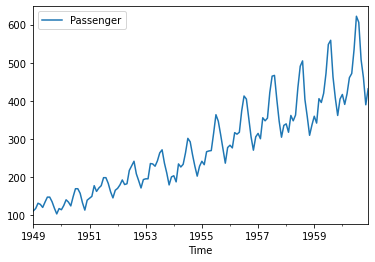

In [23]:
df.plot()

In [24]:
# Conclusion
#1. The data is non-stationary
#2. From the graph, we find seasonality in the data
#3. The data has auto-correlation

In [27]:
#The above method is a visualization method to check stationality in the data.
# The 2nd method to check stationality is to perform Adfuller

In [28]:
# Adfuller test runs on hypothesis to check stationality
# Null Hypothesis - It says that Time-Series is not stationary
# Alternate Hypothesis - it says that Time-Series is stationary

In [31]:
adf = adfuller(df["Passenger"])

In [32]:
adf #First Value - adf test statistics, Second Value - p value , Third Value - Number of lags (After how many months is the seasonality repeating), Fourth Value - Number of records without the lag

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [33]:
# Since the p value is more than 0.05, we will accept the Null Hypothesis i.e. Reject the Alternate Hypothesis.

In [34]:
# Performing First Order Differentiation to make the time series Stationary

In [35]:
df["first_difference"] = df["Passenger"]-df["Passenger"].shift(1)

In [36]:
df.head()

,Passenger,first_difference
Time,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


<AxesSubplot:xlabel='Time'>

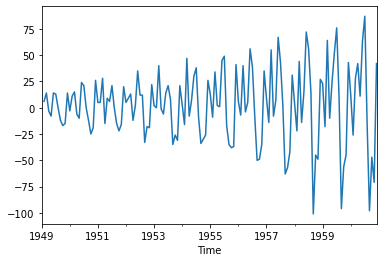

In [38]:
df["first_difference"].plot()

In [40]:
adf = adfuller(df["first_difference"].dropna())

In [41]:
adf

(-2.829266824170006,
 0.05421329028382468,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [42]:
#For building a time series model we need to know three values 
# First Value : p - p stands for the order of the model (For eg. ar1, a2, ar3)
# Second Value: q - q stands for the moving average order of the model (For eg. ma1, ma2, ma3)
# Third Value: d - d stands for order of differentiation of the model (For eg. 1st order differentiation, 2nd order differentiation, 3rd order differentiation, etc)


In [44]:
# We get all these values by looking at the acf (Auto Correlation Function) plot or the pacf(Partial Auto Correlation Function) plot

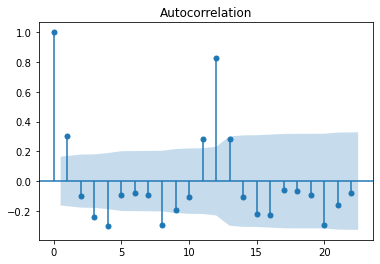

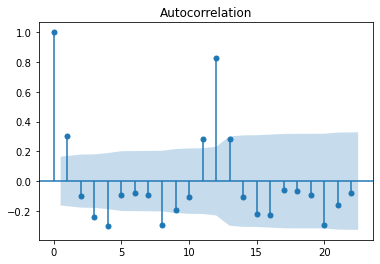

In [45]:
plot_acf(df["first_difference"].dropna())

In [46]:
# We consider acf plot as the best identification method to find our q value. We observe the decline in the graph towards 0. From the above graph we conclude that the q value is 1.

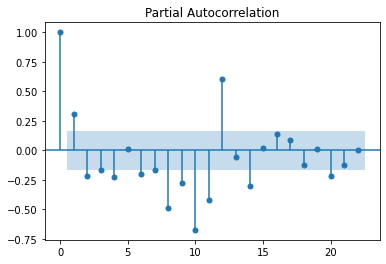

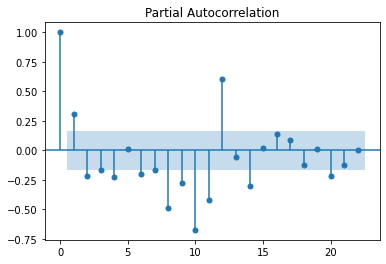

In [47]:
plot_pacf(df["first_difference"].dropna())

In [48]:
# We consider the pacf plot as the best identification method for the p value. Here also we see the decline and take the value of p. From the above graph we can see that the value of p is 1.

In [49]:
# As done previously we took the first order difference in order to make our time series stationary. Hence, d = 1.

In [52]:
# p,q,d = 1,1,1

In [53]:
## Fiting ARIMA Model

In [54]:
arima = ARIMA(df["Passenger"], order = (1,1,1))

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [55]:
arima = arima.fit()

In [57]:
df["forecast"] = arima.predict(start = 135, end = 160, dynamic = True)

<AxesSubplot:xlabel='Time'>

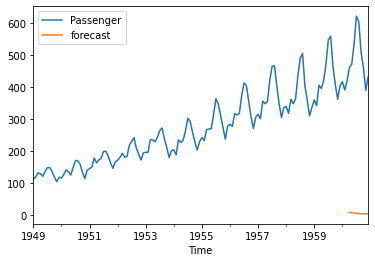

In [58]:
df[["Passenger","forecast"]].plot()

In [59]:
# The above prediction is not good because the data has seasonality. 

In [65]:
sarima = SARIMAX(df["Passenger"], order = (1,1,1), seasonal_order = (1,1,1,12))

In [66]:
sarima = sarima.fit()

In [70]:
df["sarima_forecast"] = sarima.predict( start = 135, end = 160, dynamic = True)

<AxesSubplot:xlabel='Time'>

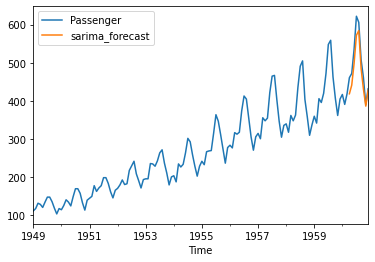

In [71]:
df[["Passenger","sarima_forecast"]].plot()

In [72]:
# Generating future dates

In [86]:
future_days = [df.index[-1]+pd.tseries.offsets.DateOffset(months = x) for x in range(36)]

In [87]:
future_days = future_days[1:]

In [88]:
future_days

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-01 00:00:00'),
 Timestamp('1963-05-

In [89]:
df

,Passenger,first_difference,forecast,sarima_forecast
Time,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN
...,...,...,...,...
1960-08-01,606,-16.0,4.273697,584.389990
1960-09-01,508,-98.0,3.841439,484.781624
1960-10-01,461,-47.0,3.521568,430.918653


In [90]:
new_df = pd.DataFrame(index = future_days, columns=df.columns)

In [91]:
new_df

,Passenger,first_difference,forecast,sarima_forecast
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN


In [92]:
final_df = pd.concat([df,new_df])

In [93]:
final_df

,Passenger,first_difference,forecast,sarima_forecast
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN
...,...,...,...,...
1963-07-01,NaN,NaN,NaN,NaN
1963-08-01,NaN,NaN,NaN,NaN
1963-09-01,NaN,NaN,NaN,NaN
1963-10-01,NaN,NaN,NaN,NaN


In [96]:
final_df['sarima_forecast'] = sarima.predict(start = 135, end = 178, dynamic = True)

<AxesSubplot:>

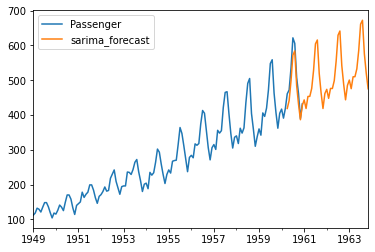

In [97]:
final_df[['Passenger','sarima_forecast']].plot()